In [1]:
import os
os.getcwd()


'c:\\Users\\faisa\\OneDrive\\Desktop\\ML-Asignment\\ML-Assignment1'

TASK 1

In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
file_path = "C:/Users/faisa/OneDrive/Desktop/ML-Asignment/titanic3.xls"
df = pd.read_excel(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
print(("Dataset shape:"),df.shape)

Dataset shape: (1309, 14)


In [6]:
print("Coloumn info:")
print(df.info())

Coloumn info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [7]:
print("Missing values number:")
print(df.isnull().sum())

Missing values number:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [8]:
print(df.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [9]:
print("Summary Statistics: ")
print(df.describe())

Summary Statistics: 
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [10]:
print("Unique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
name: 1307 unique values
sex: 2 unique values
ticket: 939 unique values
cabin: 186 unique values
embarked: 3 unique values
boat: 28 unique values
home.dest: 369 unique values


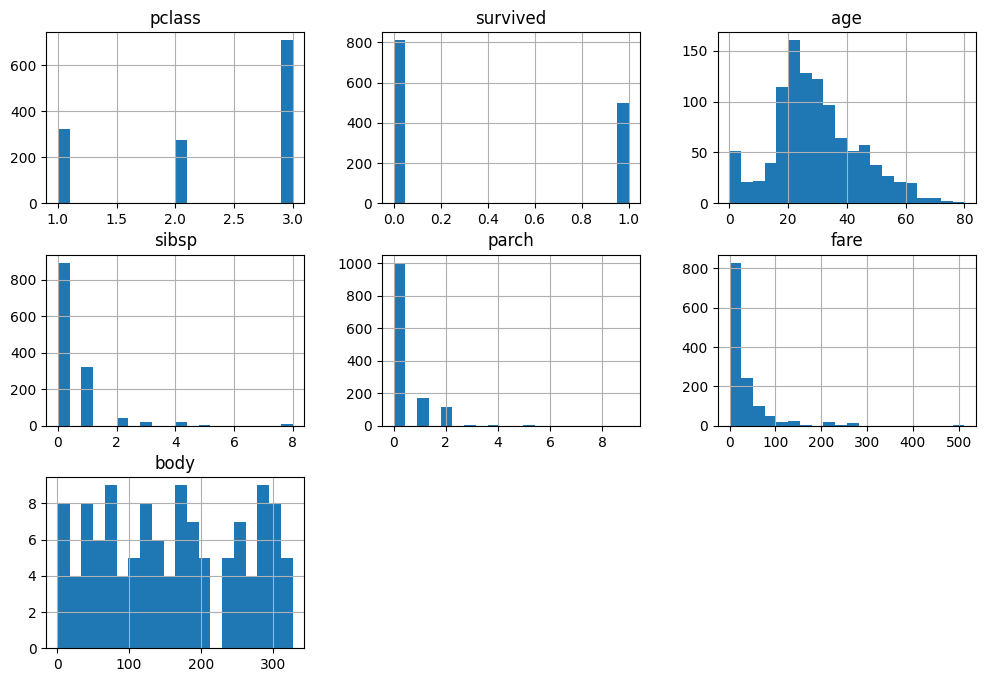

In [11]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,8), bins = 20)
plt.show()

This histogram plot shows the distribution of numerical variables in the dataset. Pclass and survived are categorical, as they have more passengers in 3rd class and fewer survivors. Fare is right-skewed which means most passengers paid more lower fares with some high amounts. SipSp and parch have many passengers with 0 relatives, but a few had large families, but some had large families. Body is uniformly distributed as it might have some missing values.

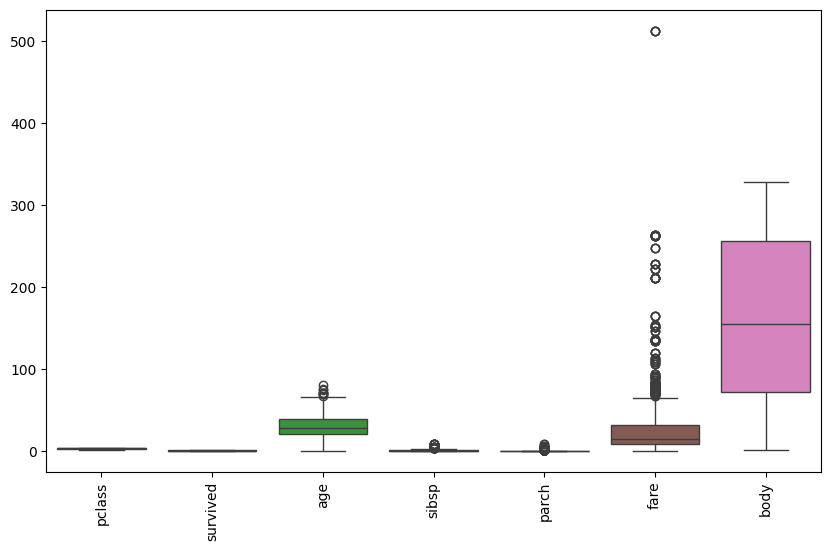

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

As you can see, pclass and survived have no variability since they are categorical, age has moderate spread with some outliers while sibsp and parch show small values with a few large families. Fare has many extreme outliers, idicating that some people paid a lot for thei ticket. Body has the largest spread, as it may have some missing values.

In [13]:
df_numeric = df.select_dtypes(include=['number'])

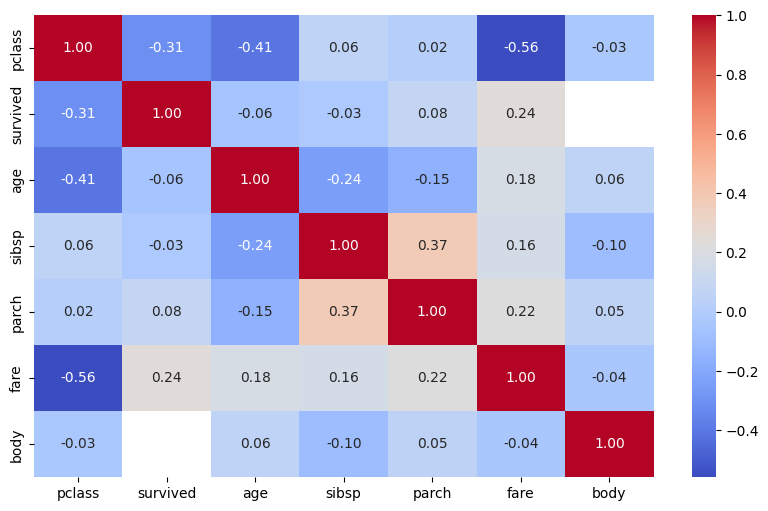

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot = True, cmap= 'coolwarm', fmt=".2f")
plt.show()

This correlation heatmap shows relationships between numerical variables. Pclass and fare have a very strong negative correlation of -0.56, this means higher class passengers paid more. Survived and pclass also has a negative correlation of -0.31 meaning higher-class passengers had a higher survival rate. Sibsp and parch are positively correlated this means that families travelled together. Fare has a weak positive correlations with survived and parch (0.24,0.22). this means that passengers with higher price tickets and families had a better chance of survival. Body has low correlations meaning it does not strongly relate to any other features.

TASK 2

In [19]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage[missing_percentage > 0])




Missing values per column:
 age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Percentage of missing values:
 age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


In [50]:
df.fillna(df.median(numeric_only=True), inplace=True)  

for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()  
    if not mode_value.empty:  
        df[col].fillna(mode_value.iloc[0], inplace=True)  

C:\Users\faisa\AppData\Local\Temp\ipykernel_6216\3926561171.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value.iloc[0], inplace=True)


I decided to fill the missing values in numerical values with the median, as the median is less affected by extreme values than the mean, I also filled the missing values in categorical values with the mode.

In [51]:
print(df.isnull().sum()) 


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


This here shows that there are no more missing values.

In [52]:
df.to_csv("cleaned_dataset.csv", index=False)


TASK 3

In [53]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


These are all the categorical values that we have in our data.

In [54]:
print(df.shape)


(1309, 14)


In [56]:
from sklearn.preprocessing import OneHotEncoder


In [57]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [59]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


name: ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
sex: ['female' 'male']
ticket: [24160 113781 19952 13502 112050 11769 'PC 17609' 'PC 17757' 'PC 17477'
 19877 27042 'PC 17318' 'PC 17558' 11813 13050 11751 111369 'PC 17483'
 13905 11967 'PC 17760' 110564 113784 112277 36928 113783 110489
 'PC 17608' 113505 111427 113054 'PC 17591' 112379 'PC 17610' 16966 113050
 113798 'PC 17476' 'PC 17606' 'PC 17755' 695 113059 113760 19924 17770
 'W.E.P. 5734' 113806 110152 'PC 17594' 112051 13508 110465 5727
 'PC 17756' 11770 113791 'WE/P 5735' 112901 'PC 17599' 113055 113804
 'F.C. 12750' 17474 33638 'PC 17761' 11755 'PC 17485' 'PC 17580' 11767
 36947 'PC 17531' 'PC 17598' '17421' 'PC 17474' '113051' '19950' '113778'
 'PC 17611' '17765' '13568' '13567' '112058' '113803' '111320' '113503'
 '112378' 'PC 17593' '17453' 'PC 17754' '113780' '112053' 'PC 17582'
 'PC 17759' '1

In [61]:
df[categorical_columns] = df[categorical_columns].astype(str)


In [62]:
if len(categorical_columns) > 0: 
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_columns = encoder.fit_transform(df[categorical_columns])
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))
    df.drop(columns=categorical_columns, inplace=True)
    df = pd.concat([df, encoded_df], axis=1)

    print("Encoding Successful! New DataFrame shape:", df.shape)
else:
    print("No categorical columns found to encode.")


Encoding Successful! New DataFrame shape: (1309, 2823)


In [65]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


In [67]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


No categorical values

In [68]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 2823 entries, pclass to home.dest_Zurich, Switzerland
dtypes: float64(2819), int64(4)
memory usage: 28.2 MB
None


In [69]:
high_cardinality_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() > 100]
df.drop(columns=high_cardinality_cols, inplace=True)
print("Dropped high-cardinality columns:", high_cardinality_cols)


Dropped high-cardinality columns: []


I realized I had too much data, as there were too many unique values so it created too many columns

In [70]:
print(df.shape)


(1309, 2823)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
df_pca = pca.fit_transform(df)

print("New shape after PCA:", df_pca.shape)  


New shape after PCA: (1309, 100)


In [72]:
df.to_csv("final_encoded_dataset.csv", index=False)
print("Final dataset saved successfully.")


Final dataset saved successfully.


TASK 4

In [73]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns to scale:", numerical_columns)


Numerical columns to scale: Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body',
       'name_Abbott, Master. Eugene Joseph',
       'name_Abbott, Mr. Rossmore Edward',
       'name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'home.dest_Wimbledon Park, London / Hayling Island, Hants',
       'home.dest_Windsor, England New York, NY', 'home.dest_Winnipeg, MB',
       'home.dest_Winnipeg, MN', 'home.dest_Woodford County, KY',
       'home.dest_Worcester, England', 'home.dest_Worcester, MA',
       'home.dest_Yoevil, England / Cottage Grove, OR',
       'home.dest_Youngstown, OH', 'home.dest_Zurich, Switzerland'],
      dtype='object', length=2823)


This shows all the numerical values

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Standardization applied successfully!")


Standardization applied successfully!


Standardization centers data around 0 and scales it so that the standard deviation is 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()
df_normalized = df.copy()  
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Normalization applied successfully!")


Normalization applied successfully!


Normalization scales data between 0 and 1 using the formula 
(
𝑥
−
min
)
/
(
max
−
min
)
(x−min)/(max−min), making it useful for models like KNN and Neural Networks that rely on distance measurements. Standardization, on the other hand, transforms data to have a mean of 0 and a standard deviation of 1 using 
(
𝑥
−
mean
)
/
std
(x−mean)/std, which is better for models like Logistic Regression and SVM that assume normally distributed data. Normalization is ideal when feature ranges vary significantly, while standardization works best for normally distributed data.

In [77]:
df_standardized.to_csv("standardized_dataset.csv", index=False)
df_normalized.to_csv("normalized_dataset.csv", index=False)

print("Final datasets saved successfully!")

Final datasets saved successfully!
